##### 데이터베이스기반 이미지 데이터셋 구성
- 데이터베이스 형태의 raw image 데이터셋 처리
- 커스텀 데이터셋 생성
- 데이터셋 정규화 : 0 ~ 1
- 이미지 데이터 형태 : (C, H, W)

- [1] 모듈 로딩 및 데이터 준비<hr>

In [110]:
##### 모듈로딩
import os
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchinfo import summary
import matplotlib.pyplot as plt

In [111]:
##### 데이터 관련 변수 및 설정
FILE_PATH = '../data/cifar-10-batches-py/'
DATA_LIST = os.listdir(FILE_PATH)

for item in DATA_LIST: print( item )

batches.meta
data_batch_1
data_batch_2
data_batch_3
data_batch_4
data_batch_5
readme.html
test_batch


In [112]:
###  데이터 추출 관련 함수 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

- [2] 데이터 추출 <hr>

In [113]:
### 데이터 파일 확인 
for item in DATA_LIST: 
    try:
        itemDict = unpickle(FILE_PATH + item)
    except:
        pass
    print(f'[{item} FILE] {itemDict.keys()}')

[batches.meta FILE] dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])
[data_batch_1 FILE] dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[data_batch_2 FILE] dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[data_batch_3 FILE] dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[data_batch_4 FILE] dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[data_batch_5 FILE] dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[readme.html FILE] dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[test_batch FILE] dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [114]:
### 데이터 정보 추출
itemDict = unpickle(FILE_PATH + DATA_LIST[0])
LABEL_NAMES = [ str(item, encoding='utf-8') for item in itemDict[b'label_names'] ]
print(LABEL_NAMES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [116]:
### 데이터 추출 
rawData = {'data':[], 'labels':[]}
for i in DATA_LIST[1:6]:
    itemDict = unpickle(FILE_PATH + i)
    rawData['data'].extend((itemDict[b'data']/255).reshape(-1,3,32,32))
    rawData['labels'].extend(itemDict[b'labels'])

In [117]:
print(f'rawData[data]   => {len(rawData["data"])}개')
print(f'rawData[labels] => {len(rawData["labels"])}개')

rawData[data]   => 50000개
rawData[labels] => 50000개


- [이미지 커스텀데이터셋]<hr>

In [118]:
class ImageDataset(Dataset):
    def __init__(self,features,targets):
        super().__init__()
        self.features = features
        self.targets = targets

    def __len__(self):
        return self.n_rows

    def __getitem__(self, index) :
        featureTS = torch.FloatTensor(self.features[index])
        targetTS = torch.tensor(self.targets[index], dtype=torch.uint8)
        return featureTS, targetTS

In [119]:
#### [테스트]
imgDS=ImageDataset(rawData["data"], rawData["labels"])

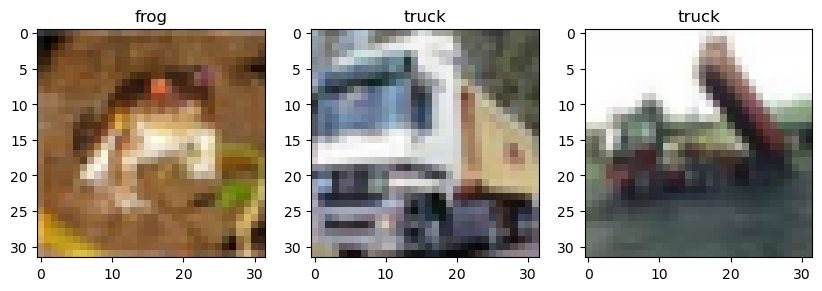

In [120]:
# 3개 데이터와 타겟 로딩 
fig, axes=plt.subplots(1,3, figsize=(10, 5))
for idx, (img_data, target) in enumerate(imgDS) :
    axes[idx].imshow(img_data.permute(1,2,0))
    axes[idx].set_title(LABEL_NAMES[target.item()])
    if idx==2: break
plt.show()